In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#import and read data
df=pd.read_excel('1673873388_rolling_stones_spotify.xlsx')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [3]:
#checking null values
pd.isnull(df).sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1605    False
1606    False
1607    False
1608    False
1609    False
Length: 1610, dtype: bool

In [7]:
df[df.duplicated()]

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms


In [8]:
sort_df=df.sort_values('popularity', ascending=True).head(10)

In [9]:
sort_df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1591,1591,Little By Little - Mono Version,England's Newest Hit Makers,1964-05-30,6,1n3XRfhLcsrpnDpvLmzLB0,spotify:track:1n3XRfhLcsrpnDpvLmzLB0,0.014100,0.475,0.731,0.103000,0.161,-8.731,0.0554,87.559,0.903,0,159733
587,587,Next Time You See Me - Live,Live At The Checkerboard Lounge,2012-07-09,8,6Y7sXOOb66zFquJ8EEL9oO,spotify:track:6Y7sXOOb66zFquJ8EEL9oO,0.075400,0.484,0.884,0.012600,0.569,-5.162,0.0987,123.344,0.603,0,660320
1338,1338,All Sold Out,Between The Buttons,1967-01-20,8,73Homv9FozXD85lbCvqkep,spotify:track:73Homv9FozXD85lbCvqkep,0.568000,0.497,0.751,0.000227,0.217,-8.733,0.0444,112.025,0.734,0,197306
1394,1394,Not Fade Away - Live,Got Live if you want it!,1966-12-10,4,3tdCzIQ5K0jT6Z1FGU27uJ,spotify:track:3tdCzIQ5K0jT6Z1FGU27uJ,0.000754,0.515,0.948,0.890000,0.814,-8.779,0.0997,122.533,0.542,0,123666
1396,1396,Fortune Teller - Live,Got Live if you want it!,1966-12-10,6,39UwRqdXwdzOiifx003bVb,spotify:track:39UwRqdXwdzOiifx003bVb,0.003590,0.332,0.989,0.000013,0.221,-7.366,0.1490,173.877,0.301,0,116933
1397,1397,The Last Time - Live,Got Live if you want it!,1966-12-10,7,3ojj6rJhR7PgYOn7bbBYEL,spotify:track:3ojj6rJhR7PgYOn7bbBYEL,0.050800,0.339,0.936,0.000000,0.558,-7.042,0.0638,103.362,0.466,0,187800
739,739,Continental Drift - Live,Flashpoint,1991-04-02,1,6fmxr9Wui3uYW7GtpscwDx,spotify:track:6fmxr9Wui3uYW7GtpscwDx,0.019500,0.296,0.735,0.725000,0.692,-22.301,0.0469,107.788,0.200,0,27693
1589,1589,Honest I Do,England's Newest Hit Makers,1964-05-30,4,6DhWfyUAX17MrrQAlgbsHw,spotify:track:6DhWfyUAX17MrrQAlgbsHw,0.136000,0.628,0.368,0.538000,0.170,-10.734,0.1080,87.178,0.470,0,129826
1400,1400,I'm Alright - Live,Got Live if you want it!,1966-12-10,10,6G6HUDo8rsJOHgBsAqPUee,spotify:track:6G6HUDo8rsJOHgBsAqPUee,0.013600,0.414,0.942,0.132000,0.940,-7.757,0.0629,119.475,0.530,0,146493
1401,1401,"Have You Seen Your Mother, Baby, Standing In T...",Got Live if you want it!,1966-12-10,11,11ALfJyppuVJdqYssXbcM1,spotify:track:11ALfJyppuVJdqYssXbcM1,0.025600,0.427,0.915,0.017900,0.890,-7.401,0.0446,109.260,0.476,0,139240


In [10]:
leastPopular=(df['popularity']==0).sum()

In [11]:
leastPopular

17

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1610.0,804.500000,464.911282,0.000000,402.250000,804.50000,1206.75000,1609.000
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304


In [23]:
popularityValues=df['popularity'].unique()
popularityValues.sort()
popularityValues
#popularityValues=popularityValues.sort_values('popularity')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 58, 59, 61, 63, 64, 66, 67, 69, 71, 72, 73, 76,
       80])

In [25]:
mostPopular=df.query('popularity>70', inplace=False).sort_values('popularity', ascending=False)
mostPopular[:10]

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1403,1403,"Paint It, Black",Aftermath,1966-04-15,1,63T7DJ1AFDD6Bn8VzG6JE8,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,0.0493,0.464,0.795,0.002440,0.3990,-9.267,0.0926,158.691,0.612,80,202266
862,862,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,1,7HKez549fwJQDzx3zLjHKC,spotify:track:7HKez549fwJQDzx3zLjHKC,0.0436,0.631,0.932,0.137000,0.0918,-4.142,0.0354,122.429,0.971,76,213066
1248,1248,Gimme Shelter,Let It Bleed,1969-12-05,1,6H3kDe7CGoWYBabAeVWGiD,spotify:track:6H3kDe7CGoWYBabAeVWGiD,0.4470,0.634,0.630,0.039000,0.1700,-8.277,0.0310,118.628,0.489,76,270773
1472,1472,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,1965-07-30,7,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,0.863,0.031700,0.1280,-7.890,0.0338,136.302,0.931,76,222813
1257,1257,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,1,1Ud6moTC0KyXMq1Oxfien0,spotify:track:1Ud6moTC0KyXMq1Oxfien0,0.5180,0.702,0.668,0.000000,0.0588,-9.237,0.2140,116.063,0.561,73,378146
901,901,Beast Of Burden - Remastered 1994,Some Girls,1978-06-09,9,77oU2rjC5XbjQfNe3bD6so,spotify:track:77oU2rjC5XbjQfNe3bD6so,0.3900,0.783,0.878,0.000778,0.0426,-3.864,0.0308,100.626,0.885,72,265173
1023,1023,Angie,Goats Head Soup (Remastered 2009),1973-08-31,5,1GcVa4jFySlun4jLSuMhiq,spotify:track:1GcVa4jFySlun4jLSuMhiq,0.6700,0.429,0.554,0.000152,0.1050,-6.128,0.0291,136.302,0.407,71,272000


In [26]:
df_Cohorts = df

In [27]:
df_Cohorts["duration"]=df_Cohorts["duration_ms"].apply(lambda x: round(x/1000))
df_Cohorts.drop("duration_ms", inplace=True, axis =1)

In [28]:
df_Cohorts

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,49
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,306
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,122


In [29]:
new_columns = df_Cohorts.columns.values
new_columns[0] = 'Id'
df_Cohorts.columns = new_columns

In [30]:
df_Cohorts = df_Cohorts.set_index('Id')

In [31]:
df_Cohorts

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
Id,,,,,,,,,,,,,,,,,
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,49
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,306
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176


[Text(0.5, 36.58159722222221, 'X'), Text(145.58159722222223, 0.5, 'Y')]

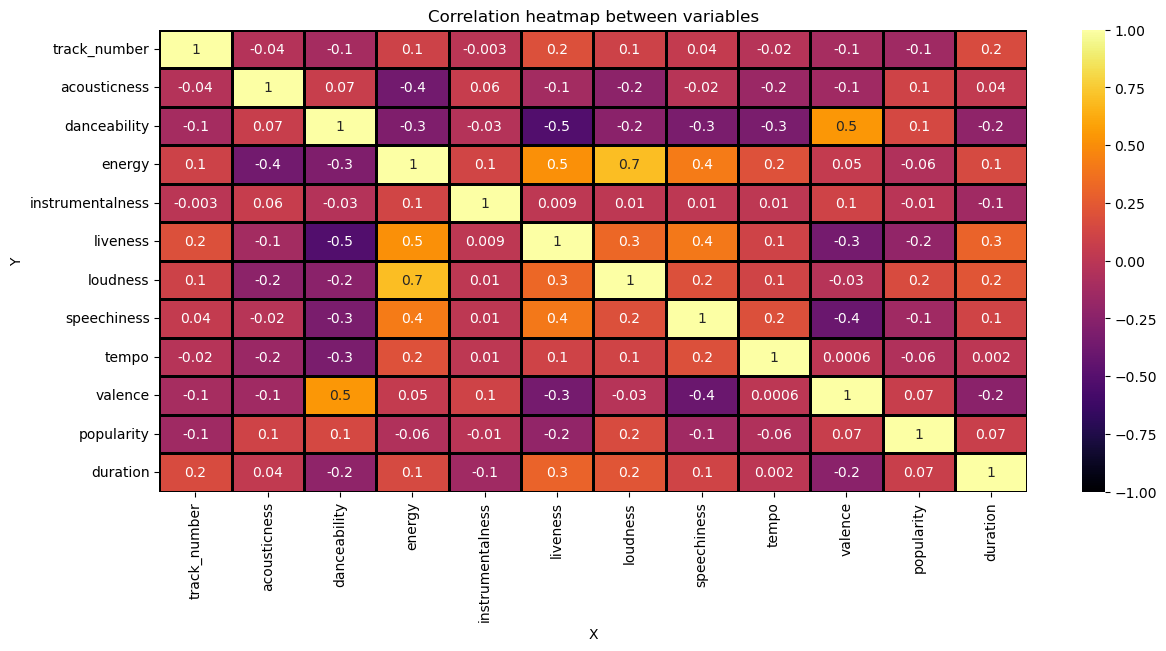

In [45]:
corr_df=df_Cohorts.corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidth=1, linecolor='Black')
heatmap.set_title('Correlation heatmap between variables')
heatmap.set(xlabel="X", ylabel="Y")
#heatmap.xaxis.tick_top()
#heatmap.set_xticklabels(heatmap.get_xticklables(), rotation=90)

In [62]:
df_Cohorts

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
Id,,,,,,,,,,,,,,,,,
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,49
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,306
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176


In [56]:
new_df=df

In [58]:
new_columns = new_df.columns.values
new_columns[0] = 'Id'
new_df.columns = new_columns
new_df = new_df.set_index('Id')
new_df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
Id,,,,,,,,,,,,,,,,,
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,49
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,306
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176


[Text(0.5, 1.0, 'Loundness vs energy correlation')]

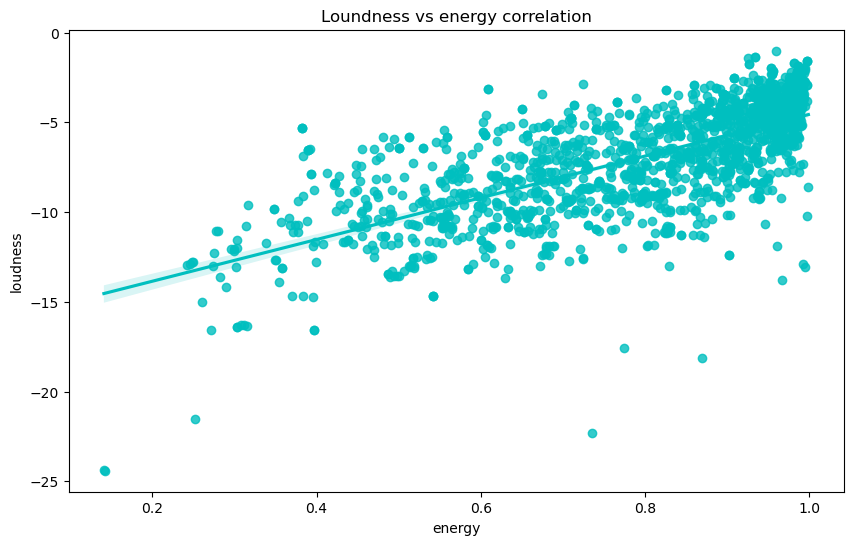

In [63]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_Cohorts, y='loudness', x='energy', color="c").set(title='Loundness vs energy correlation')

[Text(0.5, 1.0, 'popularity vs acousticness correlation')]

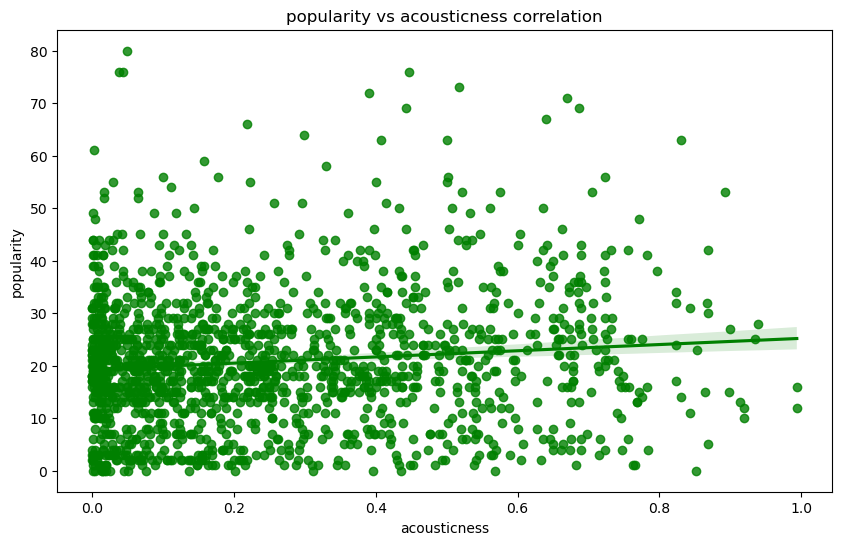

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_Cohorts, y='popularity', x='acousticness', color="g").set(title='popularity vs acousticness correlation')

In [65]:
df_Cohorts.describe

<bound method NDFrame.describe of                              name               album release_date  \
Id                                                                   
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4             Donâ€™t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
Id       

In [47]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, track_number to duration
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_number      12 non-null     float64
 1   acousticness      12 non-null     float64
 2   danceability      12 non-null     float64
 3   energy            12 non-null     float64
 4   instrumentalness  12 non-null     float64
 5   liveness          12 non-null     float64
 6   loudness          12 non-null     float64
 7   speechiness       12 non-null     float64
 8   tempo             12 non-null     float64
 9   valence           12 non-null     float64
 10  popularity        12 non-null     float64
 11  duration          12 non-null     float64
dtypes: float64(12)
memory usage: 1.5+ KB


In [49]:
corr_df.head()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
track_number,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156609
acousticness,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039048
danceability,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220110
energy,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148903
instrumentalness,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137564


In [52]:
corr_df.shape[0]

12

In [53]:
len(corr_df.index)

12

In [54]:
df.shape[0]

1610

In [66]:
df_Cohorts.set_index('release_date', inplace=True)

In [68]:
df_Cohorts['dates']=df_Cohorts.index.get_level_values('release_date')
df_Cohorts.dates=pd.to_datetime(df_Cohorts.dates)
years=df_Cohorts.dates.dt.year

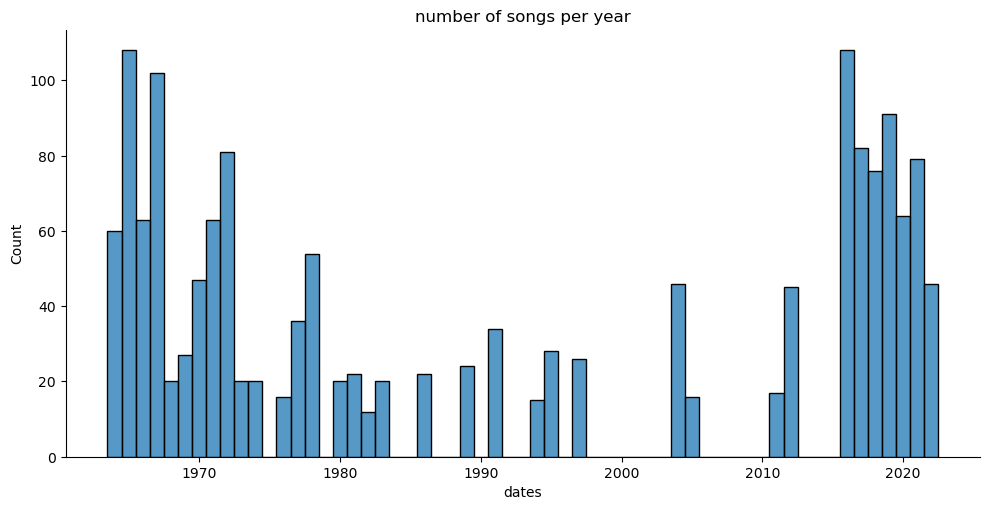

In [69]:
sns.displot(years,discrete=True,aspect=2, height=5, kind='hist').set(title='number of songs per year')

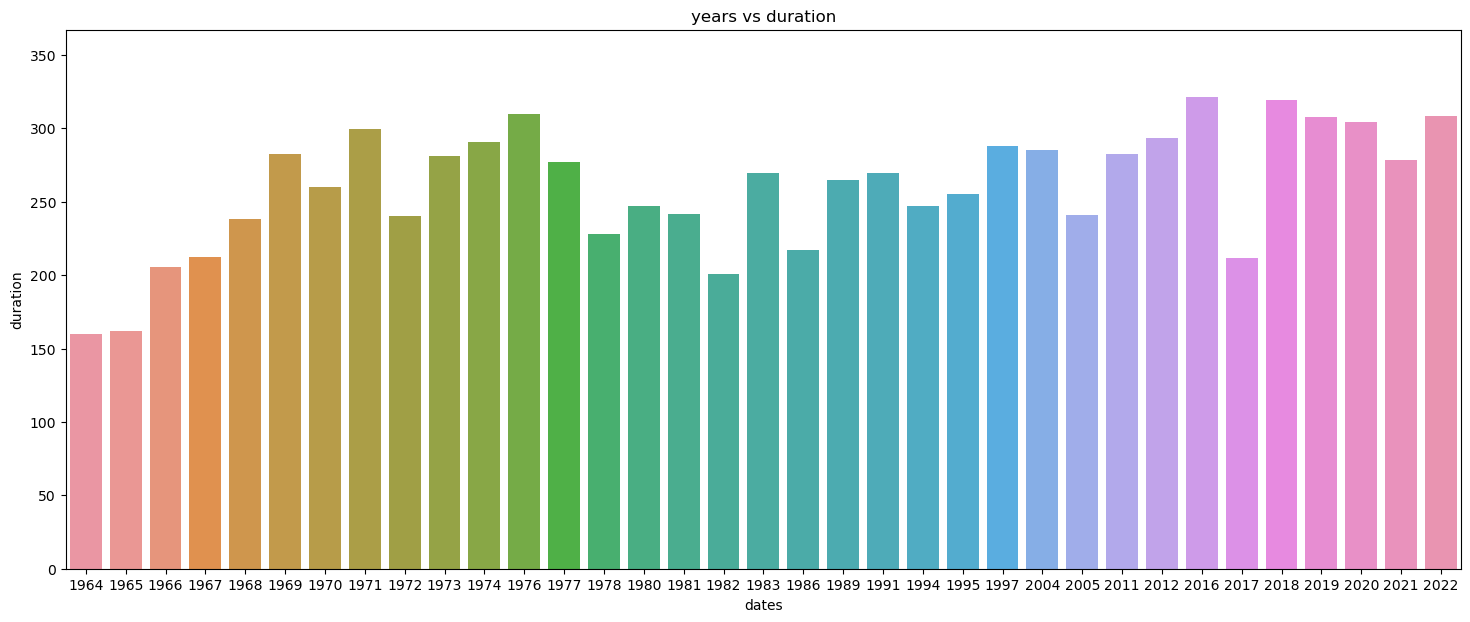

In [73]:
total_dr=df_Cohorts.duration
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x=years, y=total_dr, ax=ax, errwidth=False).set(title= 'years vs duration')
#plt.xtics(rotation=90)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

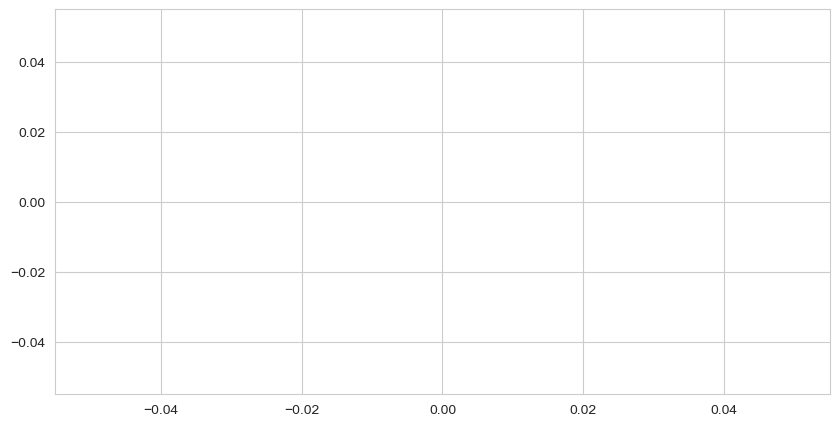

In [75]:
total_dr=df_Cohorts.duration
sns.set_style(style='whitegrid')
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)

fig=sns.lineplot(x=years, y=total_dr, ax=ax).set(title='years vs duration')

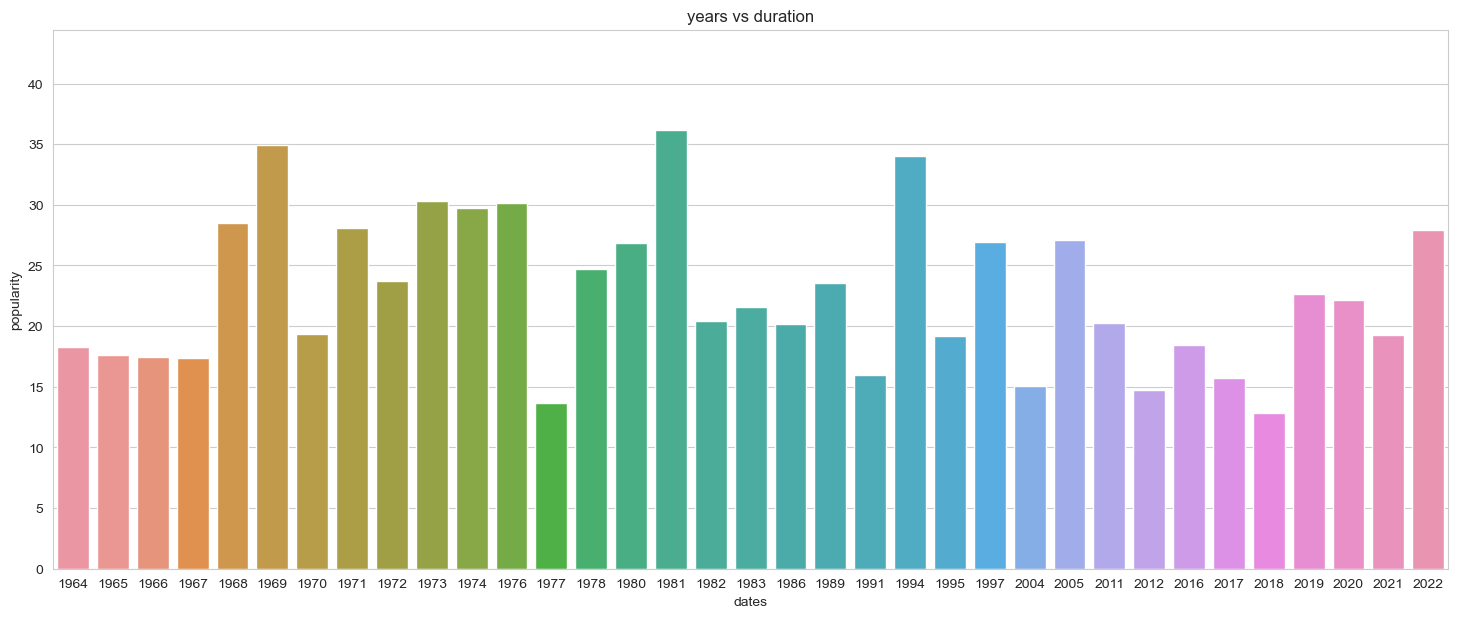

In [76]:
total_dr=df_Cohorts.popularity
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x=years, y=total_dr, ax=ax, errwidth=False).set(title= 'years vs duration')
#plt.xtics(rotation=90)

In [105]:
df_Cohorts.groupby(['album']).mean('popularity')

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
album,,,,,,,,,,,,
12 X 5,6.5,0.203860,0.489833,0.610583,0.132789,0.199467,-10.213750,0.050592,146.525500,0.704000,32.083333,160.916667
12 x 5,6.5,0.204471,0.503833,0.620583,0.128532,0.204358,-10.209417,0.048075,138.563833,0.689917,5.000000,161.000000
A Bigger Bang (2009 Re-Mastered),8.5,0.124700,0.554625,0.838437,0.000865,0.280119,-3.924500,0.056500,110.398562,0.602750,27.062500,241.000000
A Bigger Bang (Live),11.5,0.398091,0.334227,0.948318,0.431331,0.896455,-5.163318,0.120355,127.225091,0.253482,18.181818,310.636364
Aftermath,6.0,0.271906,0.594182,0.609182,0.084479,0.207373,-12.569273,0.050855,125.360000,0.684818,43.090909,233.818182
...,...,...,...,...,...,...,...,...,...,...,...,...
Undercover,5.5,0.101420,0.590800,0.826700,0.282284,0.322830,-10.193800,0.052000,121.139300,0.729100,18.000000,269.500000
Undercover (2009 Re-Mastered),5.5,0.105710,0.573400,0.932900,0.273168,0.298630,-4.773400,0.075110,128.847300,0.703100,25.100000,269.800000
Voodoo Lounge (Remastered 2009),8.0,0.187616,0.485733,0.689733,0.060069,0.199340,-6.804400,0.046927,123.063333,0.537067,34.000000,247.200000


In [87]:
df_Cohorts

,name,album,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration,dates
release_date,,,,,,,,,,,,,,,,,
2022-06-10,Concert Intro Music - Live,Licked Live In NYC,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,49,2022-06-10
2022-06-10,Street Fighting Man - Live,Licked Live In NYC,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253,2022-06-10
2022-06-10,Start Me Up - Live,Licked Live In NYC,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263,2022-06-10
2022-06-10,If You Can't Rock Me - Live,Licked Live In NYC,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,306,2022-06-10
2022-06-10,Donâ€™t Stop - Live,Licked Live In NYC,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305,2022-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964-04-16,Carol,The Rolling Stones,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154,1964-04-16
1964-04-16,Tell Me,The Rolling Stones,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245,1964-04-16
1964-04-16,Can I Get A Witness,The Rolling Stones,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176,1964-04-16


In [85]:
uniqueAlbum=df_Cohorts['album'].unique()
len(uniqueAlbum)

90

[Text(0.5, 1.0, 'Top two albums should be recommended to anyone')]

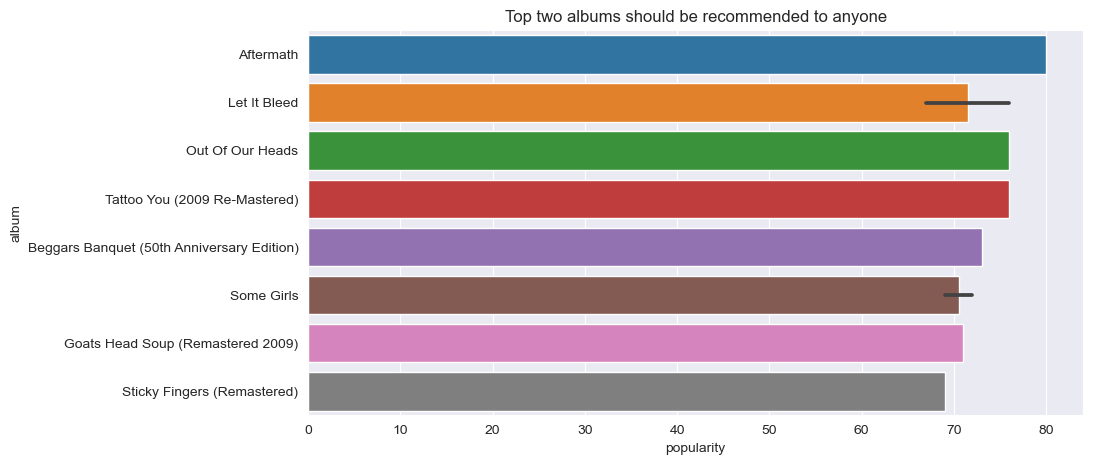

In [104]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
famous=df_Cohorts.sort_values("popularity", ascending=False).head(10)
sns.barplot(y='album', x='popularity', data=famous).set(title='Top two albums should be recommended to anyone')

In [106]:
new_df_popularity = df_Cohorts[['album','popularity']].copy()

In [107]:
new_df_popularity

,album,popularity
release_date,,
2022-06-10,Licked Live In NYC,33
2022-06-10,Licked Live In NYC,34
2022-06-10,Licked Live In NYC,34
2022-06-10,Licked Live In NYC,32
2022-06-10,Licked Live In NYC,32
...,...,...
1964-04-16,The Rolling Stones,39
1964-04-16,The Rolling Stones,36
1964-04-16,The Rolling Stones,30


In [ ]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
#famous=df_Cohorts.sort_values("popularity", ascending=False).head(10)
sns.barplot(y='album', x='popularity', data=famous).set(title='Top two albums should be recommended to anyone')

In [117]:
new_group=df_Cohorts.groupby('album')['popularity'].mean()

In [120]:
new_group

album
12 X 5                              32.083333
12 x 5                               5.000000
A Bigger Bang (2009 Re-Mastered)    27.062500
A Bigger Bang (Live)                18.181818
Aftermath                           43.090909
                                      ...    
Undercover                          18.000000
Undercover (2009 Re-Mastered)       25.100000
Voodoo Lounge (Remastered 2009)     34.000000
Voodoo Lounge Uncut (Live)          11.678571
got LIVE if you want it!            15.333333
Name: popularity, Length: 90, dtype: float64

In [129]:
albums = new_group.index.tolist()

In [132]:
popularityavg = new_group.values

In [135]:
len(albums)
len(popularityavg)

90

In [137]:
albumPopularitydf = pd.DataFrame({'albums':albums, 'popularityavg':popularityavg})

[Text(0.5, 1.0, 'Top two albums should be recommended to anyone')]

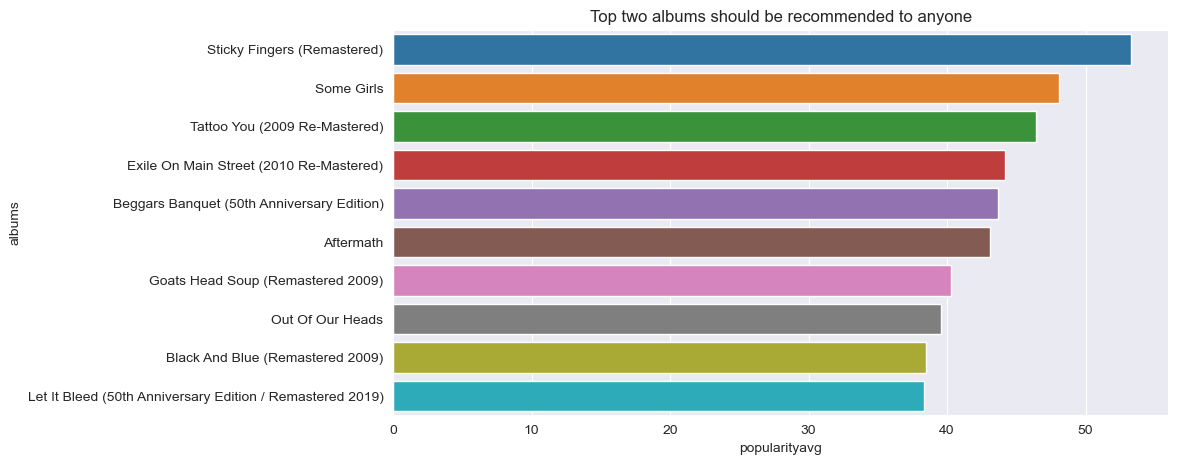

In [140]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
famous=albumPopularitydf.sort_values("popularityavg", ascending=False).head(10)
sns.barplot(y='albums', x='popularityavg', data=famous).set(title='Top two albums should be recommended to anyone')

In [141]:
pca_new_data=df_Cohorts

In [143]:
pca_new_data.columns

Index(['name', 'album', 'track_number', 'id', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration', 'dates'],
      dtype='object')

In [149]:
features=['track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration']
X=pca_new_data[features]
y=pca_new_data['popularity']

In [159]:
from sklearn.model_selection import train_test_split
# create dataset
#X, y = make_blobs(n_samples=1000)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 11) (532, 11) (1078,) (532,)


In [160]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
 
pca = PCA(n_components = 1)

print(X_train.columns);
print(X_test.columns);
X_train = pca.fit_transform(X_train)

#model = LinearRegression()
#model.fit(X_train_pca, y_train)
#X_test = pca.transform(df_test)


X_test = pca.transform(X_test)


Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration'],
      dtype='object')
Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration'],
      dtype='object')


In [162]:
data_kmeans = list(zip(X_train, y_train))


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


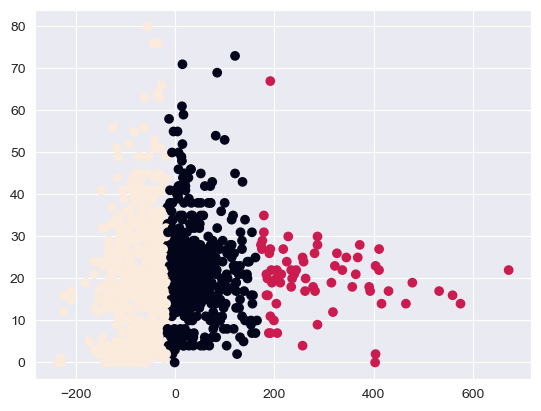

In [169]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_kmeans)

plt.scatter(X_train, y_train, c=kmeans.labels_)
plt.show()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested 

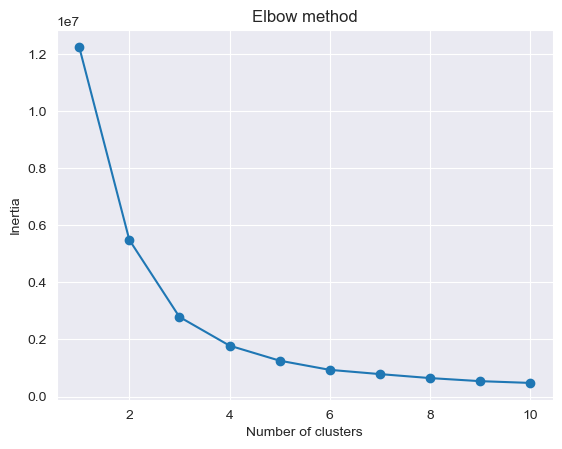

In [165]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_kmeans)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


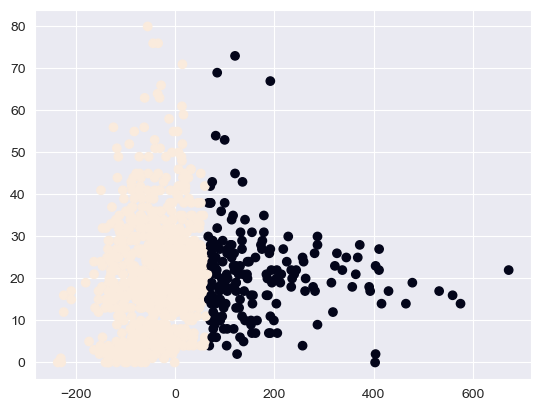

In [168]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_kmeans)

plt.scatter(X_train, y_train, c=kmeans.labels_)
plt.show()